In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import pandas as pd
from planet_cookbook import read_reports as rr
import os
import rebound
import seaborn as sns
from astropy import units as u

sol_to_earth = 332946.078
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [6]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 10,
   'xtick.labelsize': 20,
   'ytick.labelsize': 15,
   #'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

#Color-blind friendly pallete
colors = [
    "#0C7BDC",  # Vibrant Blue
    "#E66100",  # Bright Orange
    "#40B0A6",  # Teal/Aqua
    "#8B8D8B",  # Medium Grey
    "#5D3A9B"   # Muted Purple
]

vib_blue = "#0C7BDC"
teal = "#40B0A6"
purple = "#5D3A9B"

In [7]:
ueda_v3_semis = np.loadtxt('ueda2021_v3.txt')
ueda_v4_semis = np.loadtxt('ueda2021_v4.txt')

In [8]:
type(ueda_v3_semis[0])

numpy.float64

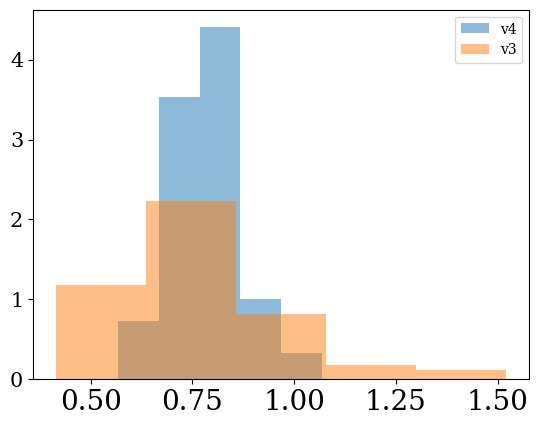

In [15]:
plt.hist(ueda_v4_semis, alpha = 0.5, density='True', label = 'v4', bins = 5)
plt.hist(ueda_v3_semis, alpha = 0.5, density='True', label = 'v3', bins = 5)

plt.legend()
plt.show()

In [47]:
bins_log = np.logspace(-1, 1.001, 50)
m = 0.015 * u.M_earth
m = m.to(u.g)

In [48]:
def compute_surface_density(semi_major_axes, m=0.01, bins_log=None, label=None):
    """
    Compute surface density for an array of semi-major axes.

    Parameters
    ----------
    semi_major_axes : array-like
        Semi-major axis values.
    m : float
        Mass of each object (default 0.01).
    bins_log : array-like
        Log-spaced bin edges. If None, defaults to np.logspace(-1, 1.001, 50)
    label : str
        Label for plotting.

    Returns
    -------
    bin_centers : np.ndarray
        Centers of the bins.
    sigma : np.ndarray
        Surface density in each bin.
    """
    if bins_log is None:
        bins_log = np.logspace(-1, 1.001, 50)
    
    counts, edges = np.histogram(semi_major_axes, bins=bins_log)
    r1, r2 = edges[:-1], edges[1:]
    areas = np.pi * (r2**2 - r1**2) * u.AU**2
    areas = areas.to(u.cm**2)
    sigma = counts * m / areas
    bin_centers = 0.5 * (r1 + r2)
    
    return bin_centers, sigma


In [54]:
centers_ueda_v3, sigma_ueda_v3 = compute_surface_density(ueda_v3_semis, m=m, label='Ueda v3')
centers_ueda_v4, sigma_ueda_v4 = compute_surface_density(ueda_v4_semis, m=m, label='Ueda v4')

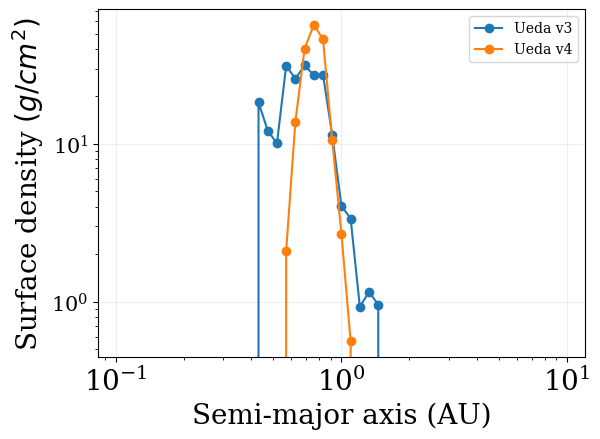

In [66]:
plt.plot(centers_ueda_v3, sigma_ueda_v3 , marker='o', label='Ueda v3')
plt.plot(centers_ueda_v4, sigma_ueda_v4 , marker='o', label='Ueda v4')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Semi-major axis (AU)')
plt.ylabel(r'Surface density $(g/cm^2)$')
plt.grid('True', alpha = 0.2)
plt.tight_layout()
plt.savefig('sigmas.pdf')

plt.show()